In [1]:
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
import get_files_from_xdrive as gxdrive

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)

# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
sys.path.append(xdrive_path)
from build_a_pipeline import transform_to_P0_and_P1_columns

In [18]:
data = gxdrive.read_file_from_xdrive_as_df("Prepared_Dataset_left_joint.csv")
data = transform_to_P0_and_P1_columns(data)
data = data.drop(columns = ['Hydroelectric_capacity_NE(MWavg)','Nuclear_capacity_SE/CW(MWavg)', 'Wind_capacity_N(MWavg)'])

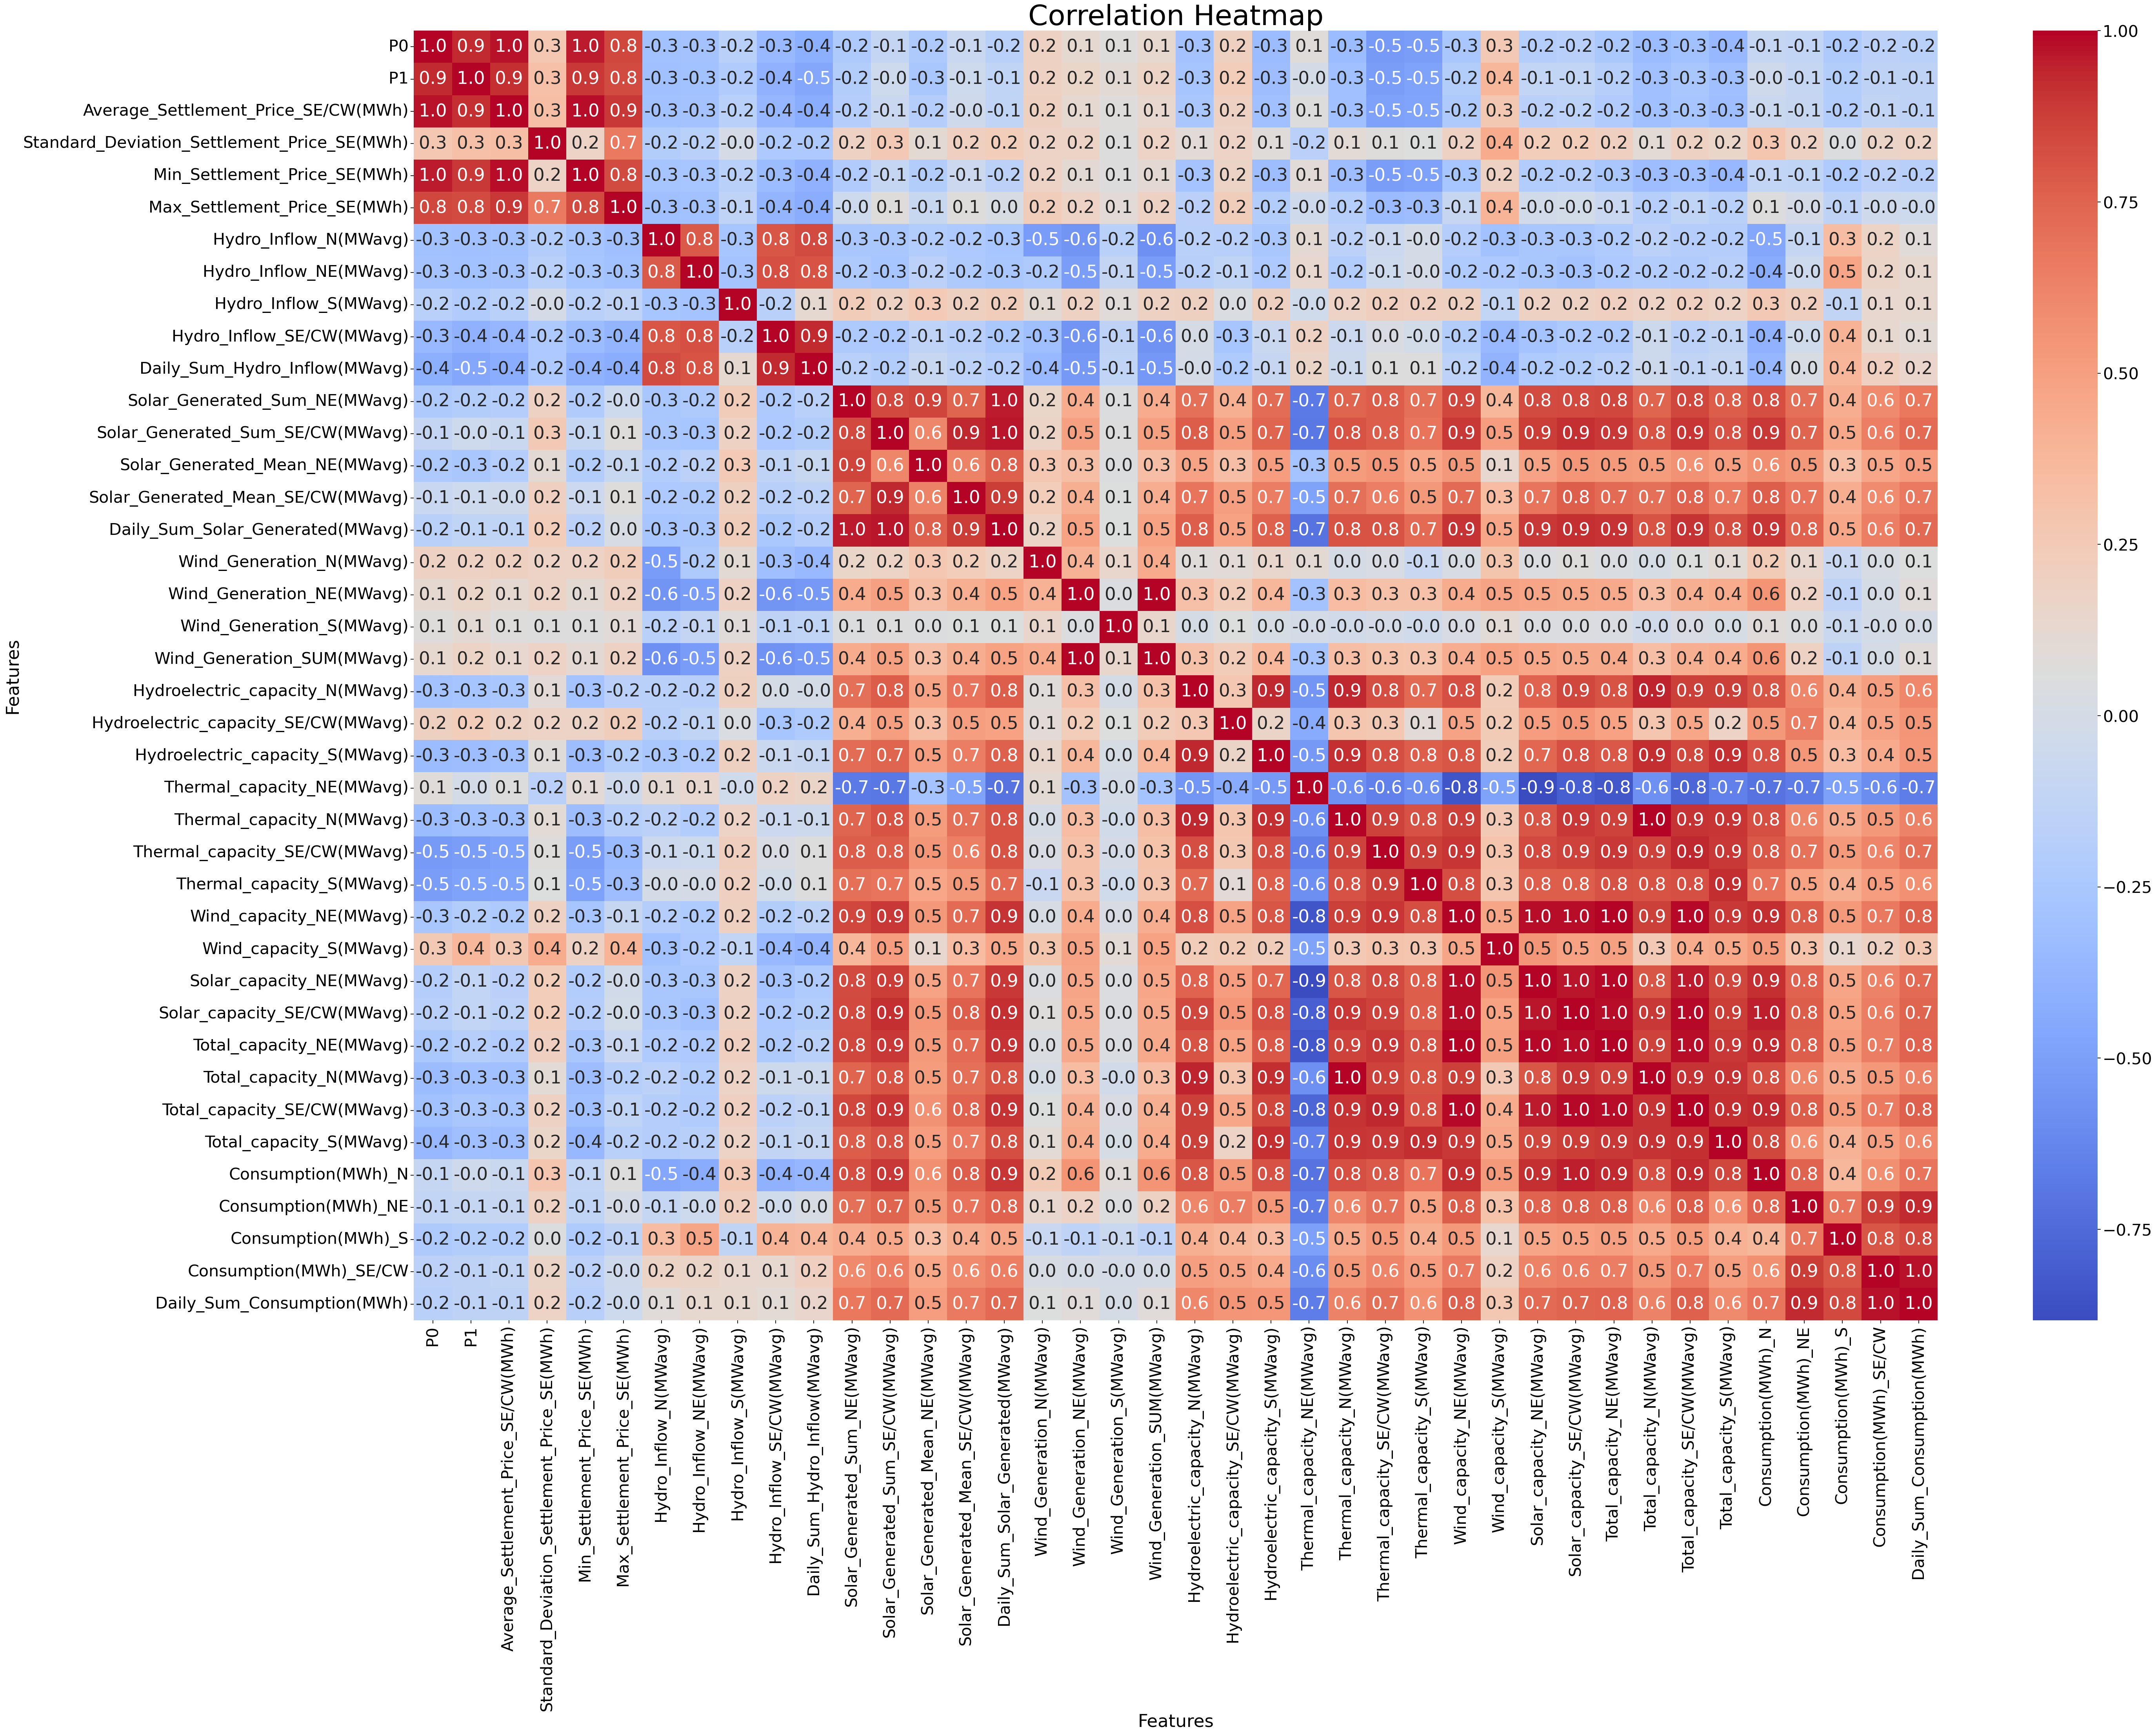

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = data.corr()

# Apply a mask: Keep only correlations with an absolute value >= 0.20
#filtered_corr = correlation_matrix[(correlation_matrix >= 0.20) | (correlation_matrix <= -0.20)]

# Set up the matplotlib figure
plt.figure(figsize=(60, 45))
#sns.set_context("talk", font_scale=1.5)
sns.set_context("notebook", font_scale=2.7)
# Create a heatmap with the filtered correlation matrix
sns.heatmap(
    correlation_matrix, 
    annot=True,         # Annotate each cell with the correlation value
    cmap="coolwarm",    # Color map
    fmt=".1f",          # Format to two decimal places
    
)

# Add title and axis labels
plt.title("Correlation Heatmap", fontsize=52)
plt.xlabel("Features")
plt.ylabel("Features")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
